In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from scipy.stats import norm

In [23]:
with open('QP_cross_validation_results.txt', 'r') as f:
    param_log = f.read().split('\n')
    G = param_log[0]
    C = param_log[1]
    parameter_scores = json.loads(param_log[3])

In [24]:
G = [ float(i) for i in G[4: -2].split(',')]
C = [ float(i) for i in C[4: -2].split(',')]

In [32]:
parameter_means = []
for key in list(parameter_scores.keys()):
    param_str = key.split('-')
    #Making this a tuple of 4 values. gamma, C, the training mean and the test mean.
    train_mean = float(parameter_scores[key]['train'].split(',')[0])
    test_mean = float(parameter_scores[key]['test'].split(',')[0])
    params_train_test_mean = (float(param_str[0][: -1]), float(param_str[1][: -1]), train_mean, test_mean)
    parameter_means.append(params_train_test_mean)

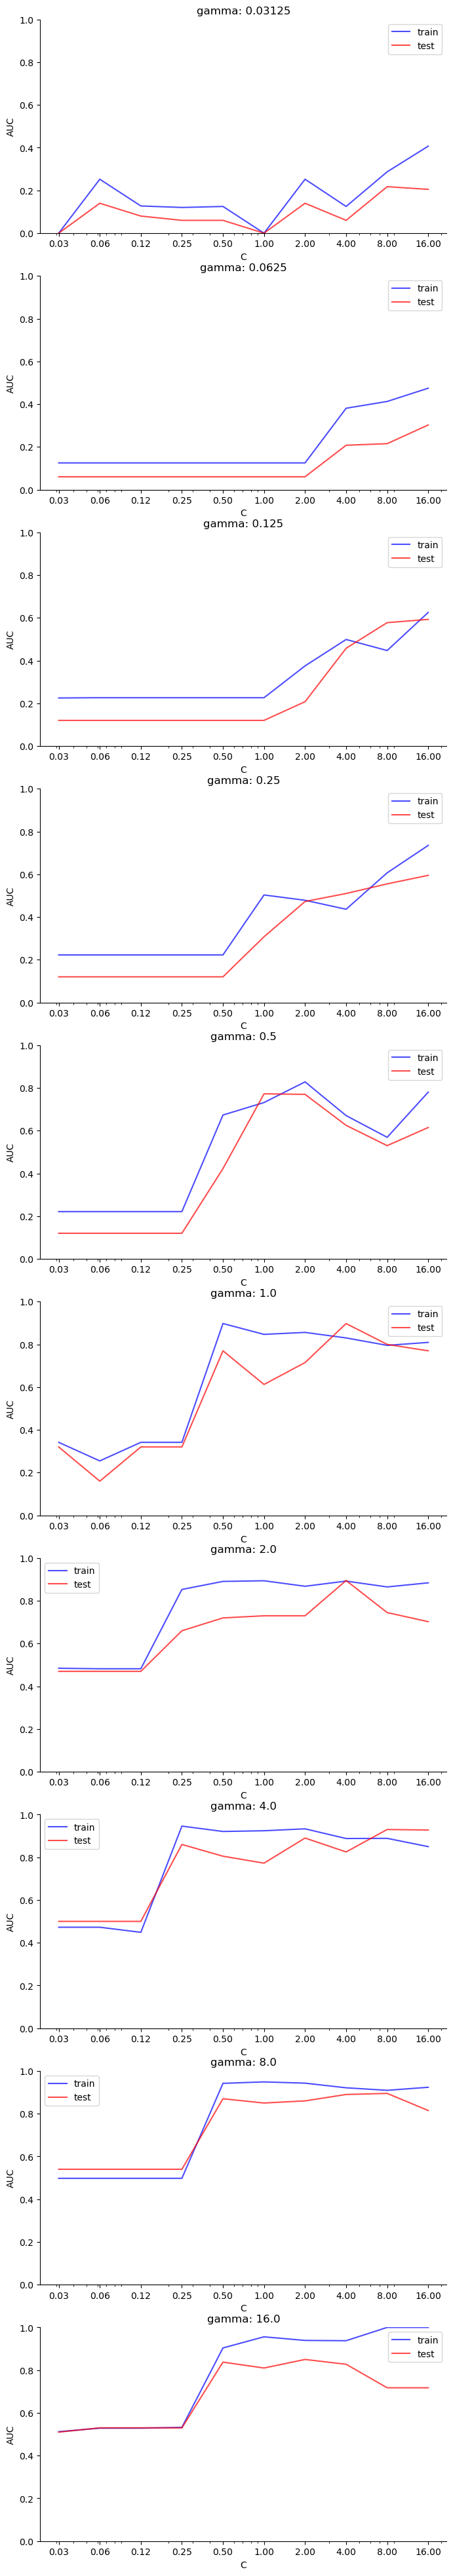

In [33]:
fig, ax = plt.subplots(10, 1, figsize = (8, 50))

for i in range(10):

    gammas = parameter_means[10 * i: 10 * (i + 1)]
    train = [float(v[2]) for v in gammas]
    test = [float(v[3]) for v in gammas]
    
    ax[i].plot(C, train, color = 'blue', label = 'train', alpha = 0.7)
    ax[i].plot(C, test, color = 'red', label = 'test' ,alpha = 0.7)
    ax[i].set_ylim(0, 1)
    ax[i].legend()
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_xscale('log')
    ax[i].set_xticks(C)
    ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax[i].set_title(f'gamma: {gammas[0][0]}')

    ax[i].set_xlabel('C')
    ax[i].set_ylabel('AUC')

plt.show()

In [36]:
parameter_means[78]

(4.0, 8.0, 0.8884920634920637, 0.9299999999999999)

In [ ]:
def plot_boundary(X_train, t_train, alphas, score_func)